In [1]:
!pip install tensorflow

In [1]:
!pip install os

ERROR: Could not find a version that satisfies the requirement os
ERROR: No matching distribution found for os


In [3]:
!pip install matplotlib

In [4]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [9]:
#Keras Libraries
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

### Section number A

In [27]:
Read_folder = r'C:\Users\benez\Desktop\EX1 - deep learning\chest_xray\chest_xray'


train_Read_folder = os.path.join(Read_folder, 'train')

test_Read_folder = os.path.join(Read_folder, 'test')

val_Read_folder = os.path.join(Read_folder, 'val')

train_p_Read_folder = os.path.join(train_Read_folder, 'PNEUMONIA')

train_n_Read_folder = os.path.join(train_Read_folder, 'NORMAL')

test_p_Read_folder = os.path.join(test_Read_folder, 'PNEUMONIA')

test_n_Read_folder = os.path.join(test_Read_folder, 'NORMAL')



# Extracting all file names 
train_PNEUMONIA_files = os.listdir(train_p_Read_folder)
train_NORMAL_files = os.listdir(train_n_Read_folder)
test_PNEUMONIA_files = os.listdir(test_p_Read_folder)
test_NORMAL_files = os.listdir(test_n_Read_folder)
print ("Accout train normal is :",len(train_NORMAL_files), "and Accout train PNEUMONIA is" , len(train_PNEUMONIA_files))
print ("Accout test normal is :",len(test_NORMAL_files), "and Accout test PNEUMONIA is" , len(test_PNEUMONIA_files))

print("Total images in the training set: ", len(train_PNEUMONIA_files+train_NORMAL_files))
print("Total images in the test set: ", len(test_PNEUMONIA_files+test_NORMAL_files))

Accout train normal is : 1341 and Accout train PNEUMONIA is 3875
Accout test normal is : 234 and Accout test PNEUMONIA is 390
Total images in the training set:  5216
Total images in the test set:  624


In [29]:
BATCH_SIZE=64
train_normalization = ImageDataGenerator(rescale=1./255)
test_normalization = ImageDataGenerator(rescale=1./255)
val_normalization = ImageDataGenerator(rescale=1./255)

train_directory=train_Read_folder
test_directory=test_Read_folder
val_directory=val_Read_folder

train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory, seed=3, validation_split=0.1, subset='training')
    
val_data = tf.keras.utils.image_dataset_from_directory(
    train_directory, seed=3, validation_split=0.1, subset='validation')

train_data=train_normalization.flow_from_directory(train_directory, target_size=(224,224),class_mode='binary', batch_size= BATCH_SIZE, color_mode='grayscale')
test_data=test_normalization.flow_from_directory(test_directory, target_size=(224,224),class_mode='binary',batch_size= BATCH_SIZE, color_mode='grayscale')
val_data=val_normalization.flow_from_directory(val_directory, target_size=(224,224),class_mode='binary', batch_size= 2, color_mode='grayscale')



print(len(train_data))
print('shape is : ',test_data.image_shape)
print('val data BATCH SIZE',len(val_data))
print(train_data.class_indices)
print(train_data.num_classes)

Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
82
shape is :  (224, 224, 1)
val data BATCH SIZE 8
{'NORMAL': 0, 'PNEUMONIA': 1}
2


In [30]:
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [31]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Flatten(input_shape=(224,224,1)))
model.add(layers.Dense(128, activation='relu', name='Dense1'))
model.add(layers.Dense(128, activation='relu', name='Dense2'))
model.add(layers.Dense(64, activation='relu', name='Dense3'))
model.add(layers.Dense(32, activation='relu', name='Dense4'))
model.add(layers.Dense(1, activation='sigmoid', name='Dense5'))
model.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 Dense1 (Dense)              (None, 128)               6422656   
                                                                 
 Dense2 (Dense)              (None, 128)               16512     
                                                                 
 Dense3 (Dense)              (None, 64)                8256      
                                                                 
 Dense4 (Dense)              (None, 32)                2080      
                                                                 
 Dense5 (Dense)              (None, 1)                 33        
                                                                 
Total params: 6,449,537
Trainable params: 6,449,537
N

### Section number B

In [32]:
model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics=['accuracy'])

In [33]:
epochs=10
model_fit = model.fit(train_data,validation_data = val_data, epochs=epochs, batch_size=BATCH_SIZE )

Epoch 1/10
82/82 [==============================] - 77s 928ms/step - loss: 0.3591 - accuracy: 0.8380 - val_loss: 0.5778 - val_accuracy: 0.7500
Epoch 2/10
82/82 [==============================] - 46s 562ms/step - loss: 0.1726 - accuracy: 0.9354 - val_loss: 0.4665 - val_accuracy: 0.8125
Epoch 3/10
82/82 [==============================] - 45s 550ms/step - loss: 0.1532 - accuracy: 0.9410 - val_loss: 0.2406 - val_accuracy: 0.9375
Epoch 4/10
82/82 [==============================] - 45s 554ms/step - loss: 0.1307 - accuracy: 0.9498 - val_loss: 0.5843 - val_accuracy: 0.7500
Epoch 5/10
82/82 [==============================] - 45s 555ms/step - loss: 0.1435 - accuracy: 0.9448 - val_loss: 0.4424 - val_accuracy: 0.8125
Epoch 6/10
82/82 [==============================] - 46s 557ms/step - loss: 0.1114 - accuracy: 0.9594 - val_loss: 0.1905 - val_accuracy: 0.9375
Epoch 7/10
82/82 [==============================] - 47s 569ms/step - loss: 0.1121 - accuracy: 0.9588 - val_loss: 0.2886 - val_accuracy: 0.8750

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


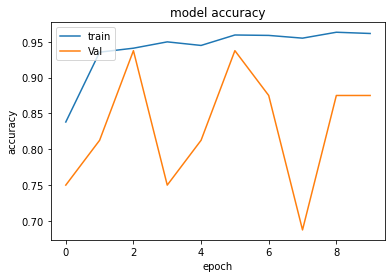

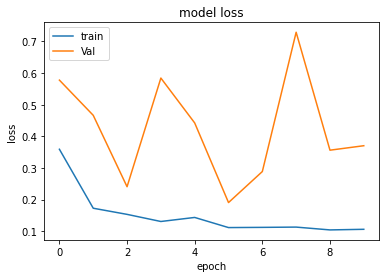

In [39]:
print(model_fit.history.keys())
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

In [55]:
predictions_DNN = model.predict(test_data) 
y_pred_Adam = predictions_DNN > 0.5
y_true_Adam = test_data.classes 

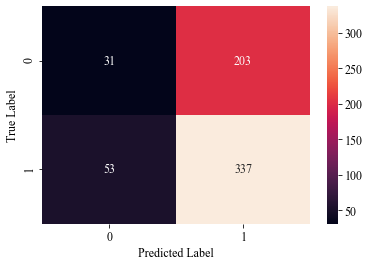

In [59]:
import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true_Adam, y_pred_Adam)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()



In [68]:
print(len(str(y_pred_Adam)))


#Recall = TruePositives / (TruePositives + FalseNegatives)
#print ("The recall is : ",Recall)

5616


In [41]:
model.save('DNN1_lr1e-4_batchsize64.h5')
# loaded_model = load_model.('DNN1_lr1e-4_batchsize64.h5')

### Section number D

In [70]:
tf.keras.backend.clear_session()

In [71]:
num_classes = 1
input_shape = (224, 224, 1)
epochs = 60

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu" ,padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dropout (Dropout)           (None, 200704)            0

In [72]:
model2.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics=['accuracy'])

history_CNN = model2.fit(train_data,validation_data = val_data, epochs = epochs ,batch_size = BATCH_SIZE)

Epoch 1/60
82/82 [==============================] - 147s 2s/step - loss: 0.4504 - accuracy: 0.7885 - val_loss: 0.7249 - val_accuracy: 0.6250
Epoch 2/60
82/82 [==============================] - 143s 2s/step - loss: 0.2227 - accuracy: 0.9178 - val_loss: 0.6863 - val_accuracy: 0.6875
Epoch 3/60
82/82 [==============================] - 147s 2s/step - loss: 0.1468 - accuracy: 0.9486 - val_loss: 0.5195 - val_accuracy: 0.6875
Epoch 4/60
82/82 [==============================] - 146s 2s/step - loss: 0.1181 - accuracy: 0.9559 - val_loss: 0.4894 - val_accuracy: 0.6875
Epoch 5/60
82/82 [==============================] - 150s 2s/step - loss: 0.0965 - accuracy: 0.9661 - val_loss: 0.2758 - val_accuracy: 0.9375
Epoch 6/60
82/82 [==============================] - 151s 2s/step - loss: 0.0846 - accuracy: 0.9720 - val_loss: 0.3584 - val_accuracy: 0.7500
Epoch 7/60
82/82 [==============================] - 148s 2s/step - loss: 0.0775 - accuracy: 0.9730 - val_loss: 0.2254 - val_accuracy: 0.9375
Epoch 8/60
82

Epoch 59/60
82/82 [==============================] - 150s 2s/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.1213 - val_accuracy: 0.9375
Epoch 60/60
82/82 [==============================] - 151s 2s/step - loss: 0.0127 - accuracy: 0.9971 - val_loss: 0.2148 - val_accuracy: 0.8750


### Section number D - section B

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


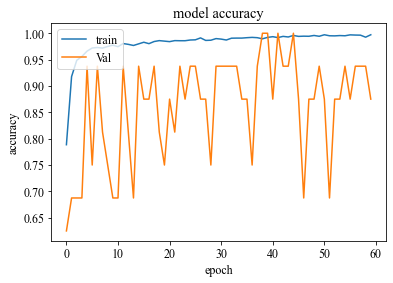

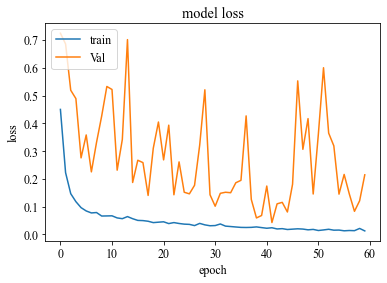

In [73]:
print(model_fit.history.keys())
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

In [41]:
!pip install pydot

In [45]:
!pip install graphviz


In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
